In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import ConnectionPatch

In [2]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_abb = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
y_ticks = ['Low', 'Medium', 'High']

def create_perf_graph(perf):
    fig, ax = plt.subplots(figsize=(7, 3))

    sns.lineplot(x=days, y=perf, ax=ax, marker='o', markersize=5)

    y_label = ax.set_ylabel('Perfomance', x=0, y=0.86)
    
    ax.set_yticks([1,2,3])
    ax.set_yticklabels(y_ticks)
    
    ax.set_title('Students Perfomance Throughtout The Week', x=0.19, y=1.05)
    
    ax.set_ylim(0.8)

    sns.despine(top=True, right=True)
    
    return ax

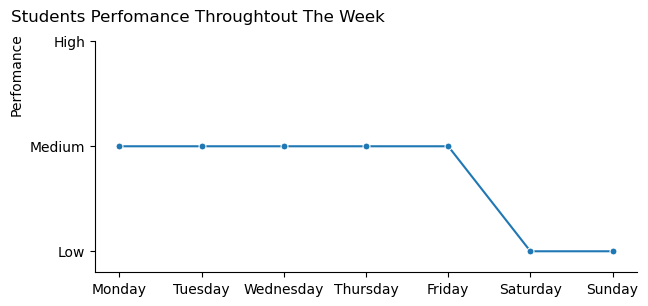

In [3]:
ax = create_perf_graph([2,2,2,2,2,1,1])

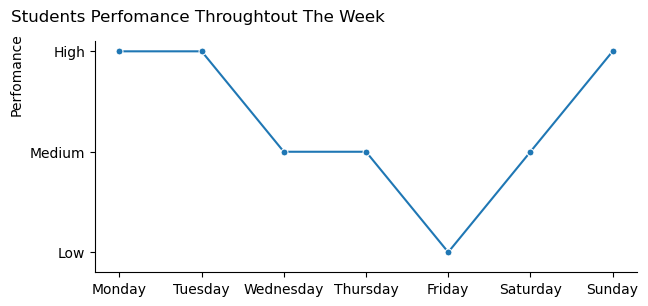

In [4]:
ax = create_perf_graph([3,3,2,2,1,2,3])

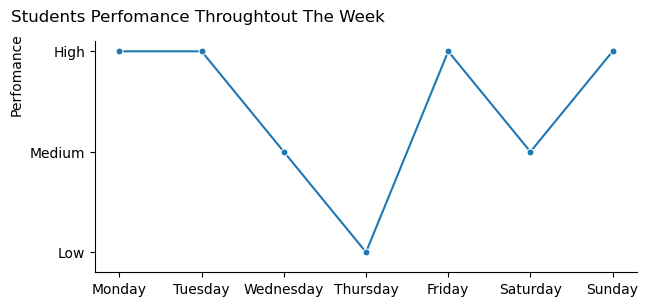

In [5]:
ax = create_perf_graph([3,3,2,1,3,2,3])

In [6]:
df = pd.read_csv('train.csv', 
                 usecols=['session_id'],
                 dtype = {'session_id':'object'})
df.head()

,session_id
0,20090312431273200
1,20090312431273200
2,20090312431273200
3,20090312431273200
4,20090312431273200


In [7]:
labels = pd.read_csv('labels.csv')

labels[['session_id', 'question']] = labels['session_id'].str.split('_', expand=True)
labels = labels.pivot(columns='question', index='session_id', values='correct')

scores = labels.sum(axis=1)
scores = scores.rename('score')

scores.head()

session_id
20090312431273200    16
20090312433251036    10
20090312455206810    17
20090313091715820    12
20090313571836404    16
Name: score, dtype: int64

In [8]:
sessions = pd.DataFrame(df['session_id'].unique(), columns=['session_id'])
sessions.head()

,session_id
0,20090312431273200
1,20090312433251036
2,20090312455206810
3,20090313091715820
4,20090313571836404


In [9]:
sessions['year'] = sessions['session_id'].str.slice(start=0, stop=2).astype(np.int8)
sessions['month'] = sessions['session_id'].str.slice(start=2, stop=4).astype(np.int8)

sessions['day'] = sessions['session_id'].str.slice(start=4, stop=6).astype(np.int8)

sessions['hour'] = sessions["hour"] = sessions["session_id"].str.slice(start=6, stop=8).astype(np.uint8)

sessions = sessions.set_index('session_id')
sessions.head()

,year,month,day,hour
session_id,,,,
20090312431273200,20,9,3,12
20090312433251036,20,9,3,12
20090312455206810,20,9,3,12
20090313091715820,20,9,3,13
20090313571836404,20,9,3,13


In [10]:
# Moving Sunday from the beggining of the week to its end
t = sessions['day']
sessions['day'] = sessions['day'].map({0:7}).fillna(t)
sessions.head()

,year,month,day,hour
session_id,,,,
20090312431273200,20,9,3.0,12
20090312433251036,20,9,3.0,12
20090312455206810,20,9,3.0,12
20090313091715820,20,9,3.0,13
20090313571836404,20,9,3.0,13


In [11]:
date_score = pd.concat([sessions, scores], axis=1)
date_score.head()

,year,month,day,hour,score
session_id,,,,,
20090312431273200,20,9,3.0,12,16
20090312433251036,20,9,3.0,12,10
20090312455206810,20,9,3.0,12,17
20090313091715820,20,9,3.0,13,12
20090313571836404,20,9,3.0,13,16


In [12]:
date_score.year.unique()

array([20, 21, 22], dtype=int8)

In [13]:
game_activity = date_score.groupby(['year', 'month']).size()
game_activity.head()

year  month
20    9          25
      10       1272
      11       1811
21    0        2032
      1        1872
dtype: int64

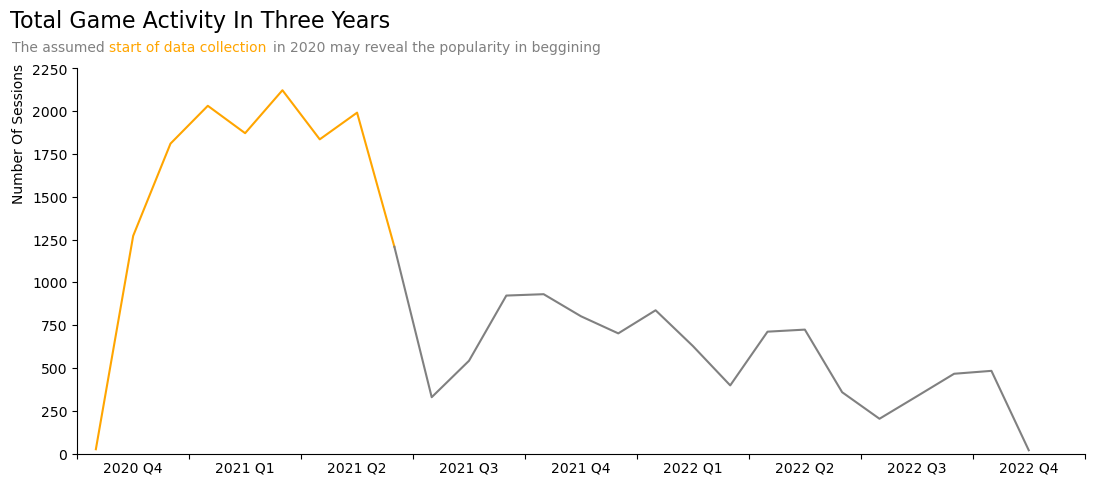

In [14]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.lineplot(x=range(9), y=game_activity[:9], ax=ax, color='orange')
sns.lineplot(x=range(8, len(game_activity)), y=game_activity[8:], ax=ax, color='grey')

y_label = ax.set_ylabel('Number Of Sessions', y=0.832)

ax.set_xlim(-0.5)
ax.set_ylim(0, 2250)

ax.set_xticks([-0.5,2.5,5.5,8.5,11.5,14.5,17.5,20.5,23.5,26.5])
ax.set_xticklabels([])

ax.set_xticks([1, 4, 7, 10, 13, 16, 19, 22, 25], minor=True)
plt.tick_params(which='minor', bottom=False, top=False, left=False, right=False)
ax.set_xticklabels(['2020 Q4','2021 Q1','2021 Q2','2021 Q3', '2021 Q4','2022 Q1','2022 Q2','2022 Q3', '2022 Q4'],
                   minor=True)

ax.set_title('Total Game Activity In Three Years', x=0.122, y=1.085, size=16)
ax.text(x=-2.25, y=2350, s="The assumed", color='grey')
ax.text(x=0.35, y=2350, s='start of data collection', color='orange')
ax.text(x=4.75, y=2350, s='in 2020 may reveal the popularity in beggining', color='grey')

sns.despine(top=True, right=True)

In [15]:
date_score['year_month'] = date_score['year'].astype('str') + '_' + date_score['month'].astype('str')
date_score.head()

,year,month,day,hour,score,year_month
session_id,,,,,,
20090312431273200,20,9,3.0,12,16,20_9
20090312433251036,20,9,3.0,12,10,20_9
20090312455206810,20,9,3.0,12,17,20_9
20090313091715820,20,9,3.0,13,12,20_9
20090313571836404,20,9,3.0,13,16,20_9


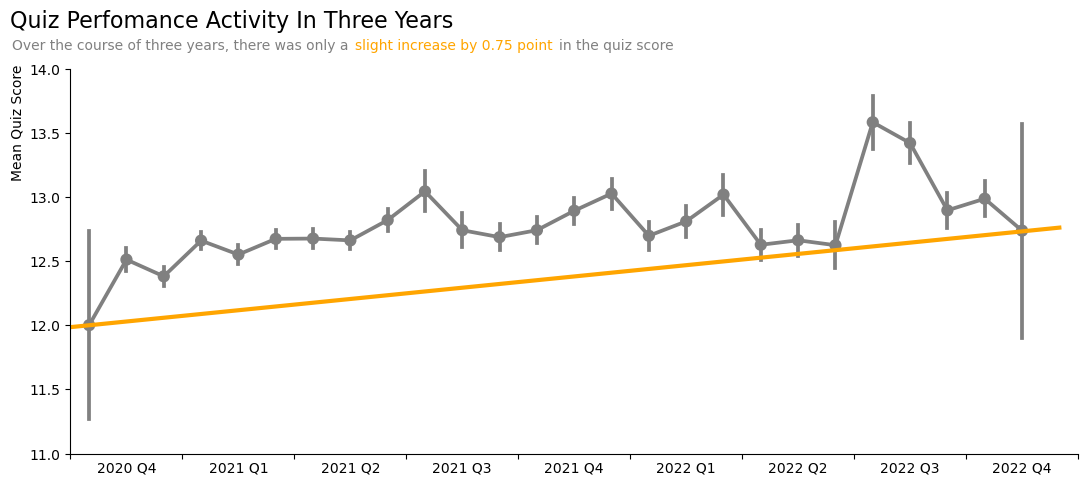

In [16]:
fig, ax = plt.subplots(figsize=(13, 5))
                   
sns.pointplot(data=date_score, x='year_month', y='score', 
              ax=ax, 
              errorbar='se',
              color='grey')

y_label = ax.set_ylabel('Mean Quiz Score', y=0.86)

ax.set_xlim(-0.5)
ax.set_ylim(11, 14)

ax.set_xticks([-0.5, 2.5,5.5,8.5,11.5,14.5,17.5,20.5,23.5,26.5])
ax.set_xticklabels([])

ax.set_xticks([1, 4, 7, 10, 13, 16, 19, 22,25], minor=True)
plt.tick_params(which='minor', bottom=False, top=False, left=False, right=False)
ax.set_xticklabels(['2020 Q4','2021 Q1','2021 Q2','2021 Q3', '2021 Q4','2022 Q1','2022 Q2','2022 Q3', '2022 Q4'],
                   minor=True)

ax.set_xlabel('')

ax.set_title('Quiz Perfomance Activity In Three Years', x=0.16, y=1.085, size=16)
ax.text(x=-2.08, y=14.15, color='grey', s='Over the course of three years, there was only a ')
ax.text(x=7.125, y=14.15, s='slight increase by 0.75 point', color='orange')
ax.text(x=12.6, y=14.15, s='in the quiz score', color='grey')

sns.lineplot(x=[-1,26], y=[11.97,12.76], color='orange', linewidth=3)

sns.despine(top=True, right=True)

In [17]:
game_activity = date_score.groupby(['day']).size()
game_activity.head()

day
1.0    3827
2.0    4136
3.0    4373
4.0    4391
5.0    4191
dtype: int64

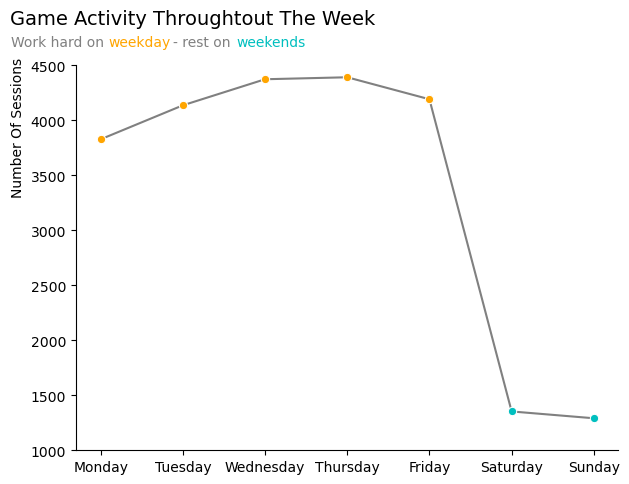

In [18]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(x=game_activity.index[4:], y=game_activity.iloc[4:],
             ax=ax, color='grey', marker='o', markerfacecolor='c')
sns.lineplot(x=game_activity.index[:5], y=game_activity.iloc[:5],
             ax=ax, color='grey', marker='o', markerfacecolor='orange')

ax.set_xlabel('')

ax.set_ylabel('Number Of Sessions', y=0.84)
ax.set_xticks(range(1,8))
ax.set_xticklabels(days)

ax.set_ylim(1000,4500)

ax.set_title('Game Activity Throughtout The Week', x=0.215, y=1.085, size=14)
ax.text(-1.09+1, 4675, 'Work hard on', color='grey')
ax.text(0.1+1, 4675, 'weekday', color='orange')
ax.text(0.88+1, 4675, '- rest on', color='grey')
ax.text(1.65+1, 4675, 'weekends', color='c')

sns.despine(top=True, right=True)

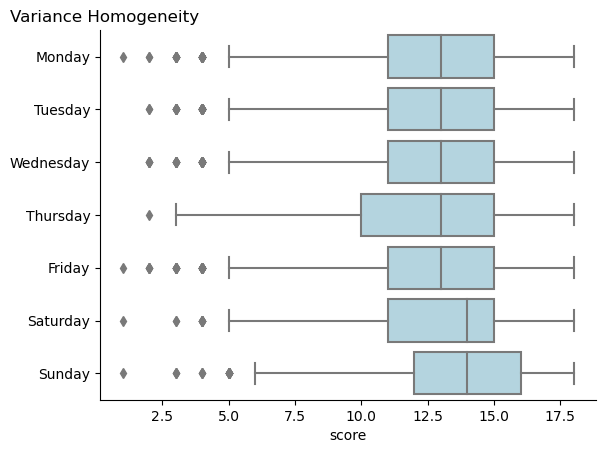

In [19]:
ax = sns.boxplot(y=date_score.day, x=date_score.score, orient='h', color='#ADD8E6')

ax.set_title('Variance Homogeneity', x=0.01)
ax.set_ylabel('')
# ax.set_xticks(range(1,8))
ax.set_yticklabels(days)
sns.despine(top=True, right=True)

In [20]:
from scipy.stats import f_oneway

groups = []
for day in range(1,8):
    groups.append(date_score.loc[date_score['day'] == day, 'score'].values)
f_oneway(*groups)

F_onewayResult(statistic=16.64439978132208, pvalue=2.949183166560351e-19)

In [21]:
# Performing multiple t-tests
from scipy.stats import ttest_ind

p_value = 0.05
comparisons = 7*6/2
p_value = p_value/comparisons

p_matrix = pd.DataFrame(index=days_abb, columns=days_abb, dtype=float)
f_matrix = pd.DataFrame(index=days_abb, columns=days_abb, dtype=float)

for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        results = ttest_ind(groups[i], groups[j])
        p_matrix.iloc[i,j] = results[1]
        f_matrix.iloc[i,j] = results[0]
            
p_matrix = p_matrix.fillna(0)
p_matrix = p_matrix.transpose() + p_matrix
np.fill_diagonal(p_matrix.values, 1)
signif_matrix = p_matrix < p_value

Text(0.11, 1.0, 'Significant Difference')

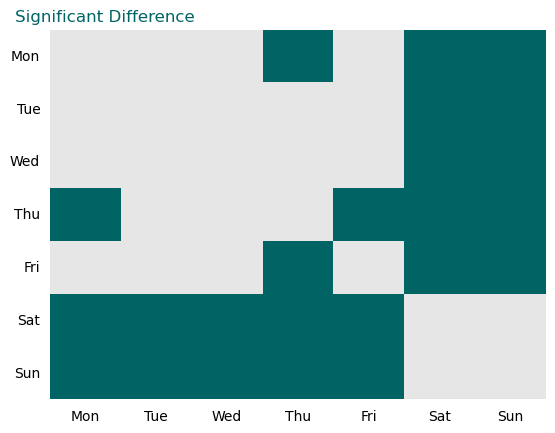

In [22]:
cyan = (0, 100/256, 100/256,1)
grey = (0.9,0.9,0.9,1)
cmap = ListedColormap([grey, cyan])

ax = sns.heatmap(signif_matrix, cbar=False, cmap=cmap)

plt.yticks(rotation=0)
ax.tick_params(left=False, bottom=False)

ax.set_title('Significant Difference', color=cyan, x=0.11)

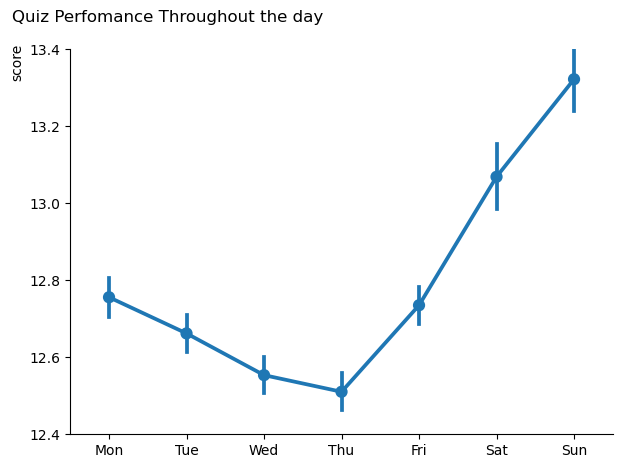

In [23]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.pointplot(data=date_score, x='day', y='score', ax=ax, errorbar='se')

ax.set_xlabel('')
ax.set_xticks(range(7))
ax.set_xticklabels(days_abb)

ax.set_title('Quiz Perfomance Throughout the day', x=0.179, y=1.05)

ax.set_ylim(12.4,13.4)
ax.set_ylabel('score',y=0.967)

sns.despine(right=True, top=True)

In [24]:
game_activity = date_score.groupby('hour').size()
game_activity.head()

hour
0    35
1    20
2    11
3    10
4    16
dtype: int64

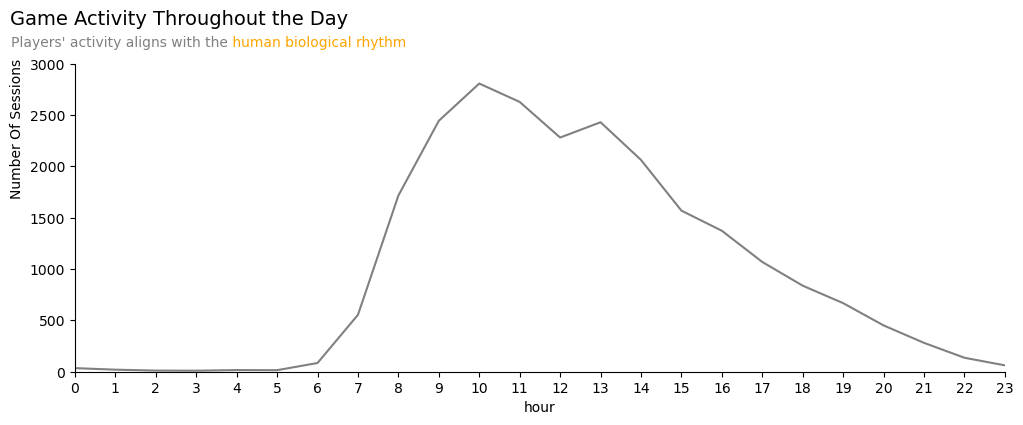

In [25]:
fig, ax = plt.subplots(figsize=(12,4))

sns.lineplot(x=game_activity.index, y=game_activity, ax=ax, color='grey')

ax.set_ylim(0,3000)
ax.set_ylabel('Number Of Sessions',x=0,y=0.79)

ax.set_xticks(range(24))
ax.set_xlim(0,23)

ax.set_title('Game Activity Throughout the Day', x=0.112, y=1.1, size=14)
ax.text(x=-1.59, y=3170, s="Players' activity aligns with the", color='grey')
ax.text(x=3.78, y=3170, s=" human biological rhythm", color='orange')

sns.despine(right=True, top=True)

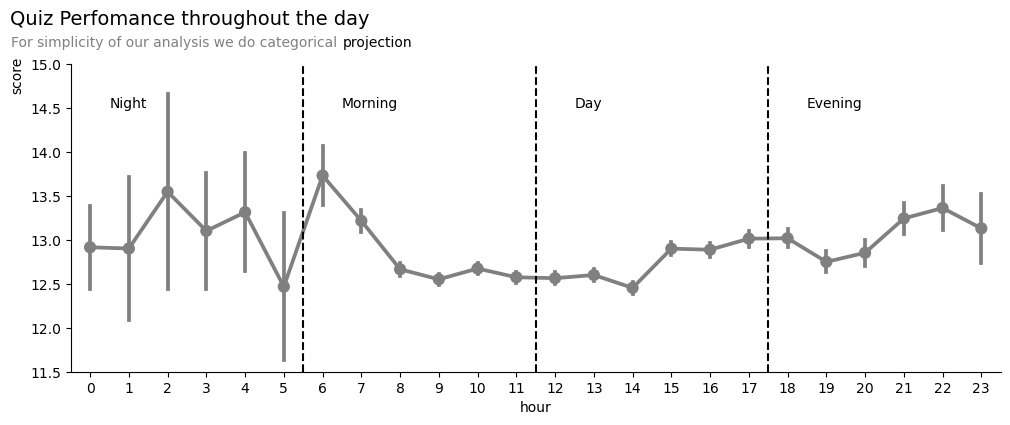

In [26]:
fig, ax = plt.subplots(figsize=(12,4))

sns.pointplot(data=date_score, x='hour', y='score', 
              errorbar='se',
              color='grey')

ax.set_title('Quiz Perfomance throughout the day', size=14, x=0.128, y=1.1)
ax.text(x=-2.05, y=15.2,s='For simplicity of our analysis we do categorical', color='grey')
ax.text(x=6.52, y=15.2,s='projection', color='black')
ax.set_ylabel('score', y=0.962)
ax.set_ylim(11.5,15)

plt.axvline(x = 5.5, color = 'black', linestyle='--')
plt.axvline(x = 11.5, color = 'black', linestyle='--')
plt.axvline(x = 17.5, color = 'black', linestyle='--')

ax.text(x=0.5,y=14.5,s='Night')
ax.text(x=6.5,y=14.5,s='Morning')
ax.text(x=12.5,y=14.5,s='Day')
ax.text(18.5,y=14.5,s='Evening')

sns.despine(right=True, top=True)

In [27]:
day_time = {}

for i in range(24):
    if i < 6:
        day_time[i] = 0
    elif i < 12:
        day_time[i] = 1
    elif i < 18:
        day_time[i] = 2
    else:
        day_time[i] = 3

date_score['day_time'] = date_score['hour'].map(day_time)
date_score.head()

,year,month,day,hour,score,year_month,day_time
session_id,,,,,,,
20090312431273200,20,9,3.0,12,16,20_9,2
20090312433251036,20,9,3.0,12,10,20_9,2
20090312455206810,20,9,3.0,12,17,20_9,2
20090313091715820,20,9,3.0,13,12,20_9,2
20090313571836404,20,9,3.0,13,16,20_9,2


In [28]:
performance = date_score.groupby('day_time')['score'].mean()
performance

day_time
0    12.990654
1    12.654485
2    12.684562
3    12.960591
Name: score, dtype: float64

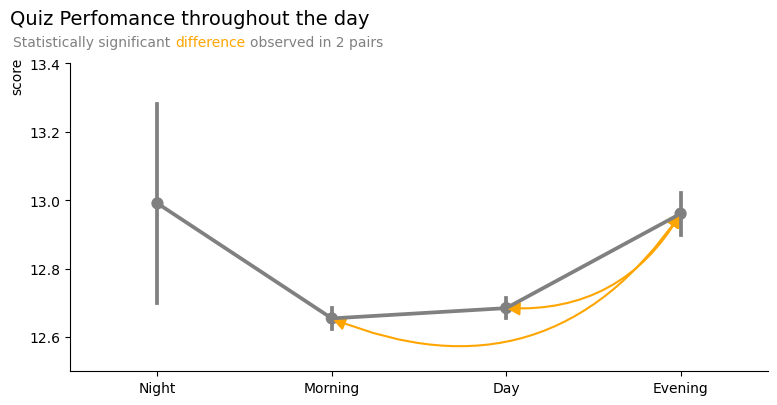

In [29]:
fig, ax = plt.subplots(figsize=(9,4))

sns.pointplot(data=date_score, x='day_time', y='score', 
              errorbar='se',
              color='grey')

ax.set_title('Quiz Perfomance throughout the day', size=14, x=0.172, y=1.1)
ax.text(x=-0.83,y=13.45,s='Statistically significant', color='grey')
ax.text(x=0.1,y=13.45,s='difference', color='orange')
ax.text(x=0.53,y=13.45,s='observed in 2 pairs', color='grey')

ax.set_ylabel('score', y=0.96)
ax.set_ylim(12.5,13.4)

ax.set_xticklabels(['Night', 'Morning', 'Day', 'Evening'])
ax.set_xlabel('')

arrow = ConnectionPatch(xyA=(1, performance[1]),
                        xyB=(3, performance[3]),
                        coordsA="data",
                        coordsB="data",
                        arrowstyle='<|-|>,head_width=0.4,head_length=0.8',
                        linewidth=1.5,
                        edgecolor='orange',
                        facecolor='orange',
                        connectionstyle='arc3,rad=.4')
ax.add_artist(arrow)
                        
arrow = ConnectionPatch(xyA=(2, performance[2]),
                        xyB=(3, performance[3]),
                        coordsA="data",
                        coordsB="data",
                        arrowstyle='<|-|>,head_width=0.4,head_length=0.8',
                        linewidth=1.5,
                        edgecolor='orange',
                        facecolor='orange',
                        connectionstyle='arc3,rad=.3')
ax.add_artist(arrow)

sns.despine(right=True, top=True)